In [1]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
import inspect

top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from benchmarking import RandomParams, Benchmark, new_random_benchmark, Solver, new_graph_file_benchmark
import re

In [6]:
def generate():
  return [
    RandomParams(directed=True, num_vertices=50, average_degree=a) 
      for a in np.arange(1, 2.0, 0.1) for _ in range(100)
  ]

params_code = inspect.getsource(generate)
params_list = generate()

benchmark = new_random_benchmark(params_list, solvers=[
	Solver("brute", "FAST_BOUND"),
	Solver("brute", "BRUTE_FORCE"),
], params_code = params_code, override_benchmark_path="../benchmarks/test")

benchmark.benchmark_path

'../benchmarks/test(8)'

In [3]:
benchmark = Benchmark.load("../benchmarks/test_50_runs")

In [7]:
benchmark.run(retryFailures=False, timeout=10)


graph: 0.txt, solver: brute('FAST_BOUND') ... 

✅
length: 7, run_time: 1.1e-05
graph: 1.txt, solver: brute('FAST_BOUND') ... ✅
length: 6, run_time: 8e-06
graph: 2.txt, solver: brute('FAST_BOUND') ... ✅
length: 6, run_time: 8e-06
graph: 3.txt, solver: brute('FAST_BOUND') ... ✅
length: 6, run_time: 9e-06
graph: 4.txt, solver: brute('FAST_BOUND') ... ✅
length: 11, run_time: 1e-05
graph: 5.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 9e-06
graph: 6.txt, solver: brute('FAST_BOUND') ... ✅
length: 17, run_time: 1e-05
graph: 7.txt, solver: brute('FAST_BOUND') ... ✅
length: 10, run_time: 9e-06
graph: 8.txt, solver: brute('FAST_BOUND') ... ✅
length: 14, run_time: 1e-05
graph: 9.txt, solver: brute('FAST_BOUND') ... ✅
length: 10, run_time: 1e-05
graph: 10.txt, solver: brute('FAST_BOUND') ... ✅
length: 12, run_time: 1.4e-05
graph: 11.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 9e-06
graph: 12.txt, solver: brute('FAST_BOUND') ... ✅
length: 14, run_time: 1.3e-05
graph: 13.txt, solver: brute('FAST_BOUND') ... ✅
length

In [8]:
df = benchmark.get_dataframe()
df

,path,run_time,length,solver,graph_id,solver_name,vertices,edges,average_out_degree,directed_spec,num_vertices_spec,average_degree_spec
0,"[17, 35, 44, 28, 48, 46, 47, 36]",0.000011,7,0,0,brute('FAST_BOUND'),50,51,1.02,True,50,1.0
1,"[30, 45, 1, 24, 29, 17, 25]",0.000008,6,0,1,brute('FAST_BOUND'),50,38,0.76,True,50,1.0
2,"[11, 24, 35, 48, 40, 3, 39]",0.000008,6,0,2,brute('FAST_BOUND'),50,37,0.74,True,50,1.0
3,"[11, 46, 14, 43, 32, 37, 6]",0.000009,6,0,3,brute('FAST_BOUND'),50,45,0.90,True,50,1.0
4,"[29, 28, 22, 6, 24, 2, 18, 31, 44, 35, 16, 48]",0.000010,11,0,4,brute('FAST_BOUND'),50,55,1.10,True,50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"[38, 26, 0, 1, 40, 24, 44, 45, 16, 8, 31, 41, ...",0.016655,32,1,995,brute('BRUTE_FORCE'),50,100,2.00,True,50,1.9
1996,"[19, 35, 17, 28, 10, 18, 32, 37, 38, 49, 24, 4...",0.000223,23,1,996,brute('BRUTE_FORCE'),50,83,1.66,True,50,1.9
1997,"[10, 7, 29, 13, 9, 14, 8, 33, 17, 42, 37, 48, ...",0.002021,29,1,997,brute('BRUTE_FORCE'),50,117,2.34,True,50,1.9
1998,"[26, 6, 14, 20, 49, 18, 44, 33, 22, 39, 24, 3,...",0.000017,17,1,998,brute('BRUTE_FORCE'),50,84,1.68,True,50,1.9


<Axes: xlabel='average_out_degree', ylabel='average_degree_spec'>

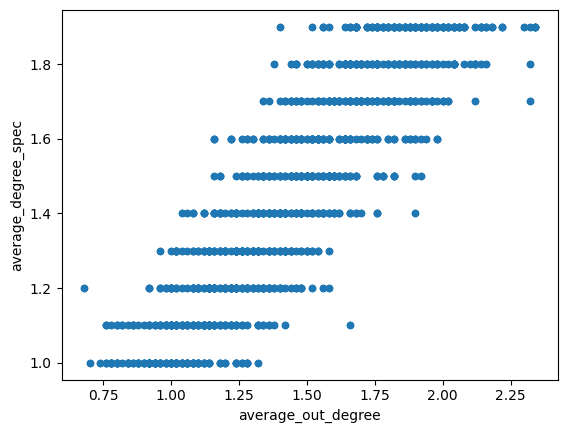

In [9]:
df[["average_out_degree", "average_degree_spec"]].plot.scatter(x="average_out_degree", y="average_degree_spec")

<Axes: title={'center': 'average_out_degree'}, xlabel='[average_degree_spec]'>

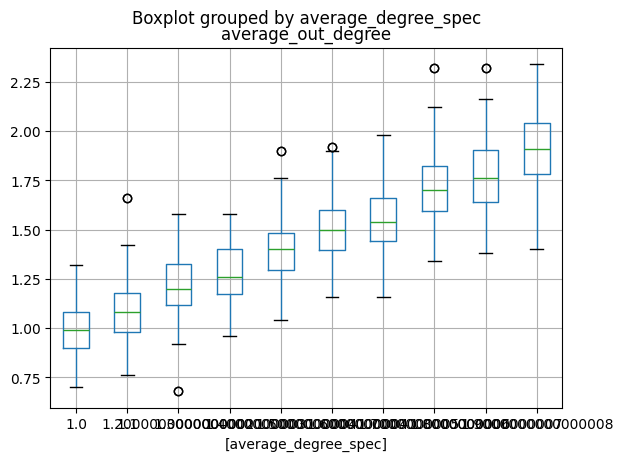

In [10]:
df[["average_out_degree", "average_degree_spec"]].boxplot(by="average_degree_spec")


<Axes: ylabel='Frequency'>

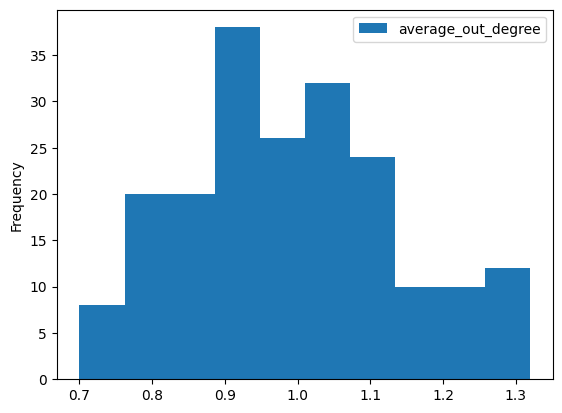

In [11]:
df[df["average_degree_spec"] == 1.0][["average_out_degree"]].plot.hist(bins=10)

run_time    Axes(0.125,0.11;0.775x0.77)
dtype: object

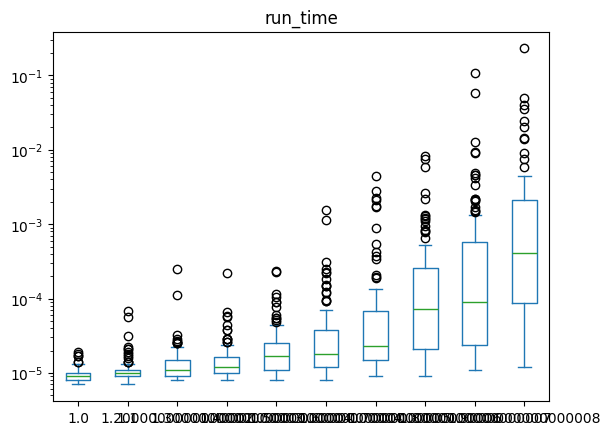

In [12]:
df[df["solver"] == 0][["run_time", "average_degree_spec"]].plot.box(by="average_degree_spec", logy=True)


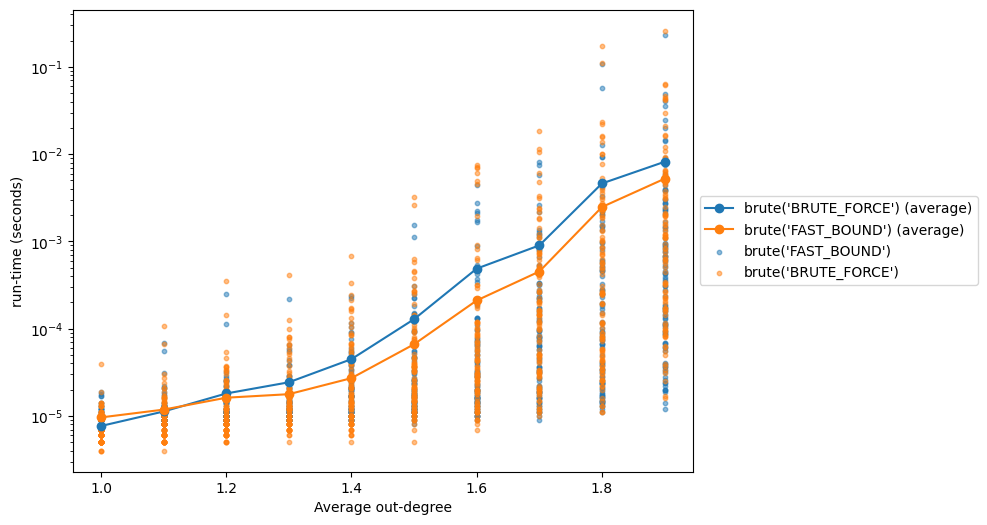

In [14]:
view = df[['average_degree_spec', 'solver_name','length', 'run_time']]

to_plot = df.groupby(['average_degree_spec', 'solver', 'solver_name']).agg({'run_time': 'mean'}).reset_index() \
    .pivot(index='average_degree_spec', columns='solver_name', values='run_time') \
    .rename(columns=lambda x: x + " (average)");

to_plot.plot(style="o-")

for solver_name in benchmark.solver_names():
    solver_df = df[df["solver_name"] == solver_name]  # Select rows where run-time is not null
    plt.scatter(solver_df['average_degree_spec'], solver_df['run_time'], label=solver_name, alpha=0.5, s=10)

plt.yscale('log')
# plt.xticks(np.arange(1, 4.0, 0.5))
plt.ylabel("run-time (seconds)")
plt.xlabel("Average out-degree")
# plt.title("Longest path solve-time for random directed graphs with 50 vertices")
# plt.axhline(y=0.015, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# df[df["solver"] == 0].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# df[df["solver"] == 1].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# plt.ylim(0, 0.010)

plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

In [16]:
df[df["average_out_degree"] > 2]

,path,run_time,length,solver,graph_id,solver_name,vertices,edges,average_out_degree,directed_spec,num_vertices_spec,average_degree_spec
702,"[27, 48, 35, 42, 49, 21, 13, 31, 22, 28, 7, 37...",0.000658,32,0,702,brute('FAST_BOUND'),50,101,2.02,True,50,1.7
718,"[12, 41, 47, 33, 49, 42, 8, 46, 22, 34, 40, 6,...",0.005818,32,0,718,brute('FAST_BOUND'),50,116,2.32,True,50,1.7
733,"[14, 17, 13, 37, 33, 0, 15, 5, 35, 39, 9, 22, ...",0.000319,30,0,733,brute('FAST_BOUND'),50,101,2.02,True,50,1.7
782,"[16, 31, 28, 13, 20, 11, 19, 46, 24, 4, 38, 35...",0.008130,35,0,782,brute('FAST_BOUND'),50,106,2.12,True,50,1.7
805,"[9, 1, 44, 40, 6, 28, 42, 8, 48, 15, 16, 46, 4...",0.004563,31,0,805,brute('FAST_BOUND'),50,106,2.12,True,50,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"[37, 23, 45, 22, 27, 17, 9, 18, 14, 41, 1, 42,...",0.003090,29,1,982,brute('BRUTE_FORCE'),50,101,2.02,True,50,1.9
1983,"[7, 20, 35, 5, 46, 8, 44, 48, 34, 6, 0, 10, 13...",0.003466,30,1,983,brute('BRUTE_FORCE'),50,104,2.08,True,50,1.9
1991,"[11, 29, 36, 8, 10, 4, 43, 1, 28, 44, 23, 19, ...",0.012110,33,1,991,brute('BRUTE_FORCE'),50,109,2.18,True,50,1.9
1993,"[3, 38, 17, 13, 37, 45, 44, 0, 26, 9, 25, 18, ...",0.005606,32,1,993,brute('BRUTE_FORCE'),50,101,2.02,True,50,1.9


In [17]:
to_plot2 = df[df["average_out_degree"] < 2].groupby("solver").get_group(0)[["run_time", "average_out_degree"]].sort_values(by="average_out_degree")
to_plot2


,run_time,average_out_degree
268,0.000009,0.68
96,0.000007,0.70
2,0.000008,0.74
1,0.000008,0.76
183,0.000008,0.76
...,...,...
842,0.002083,1.98
914,0.000060,1.98
647,0.002218,1.98
761,0.000533,1.98


<Axes: xlabel='average_out_degree'>

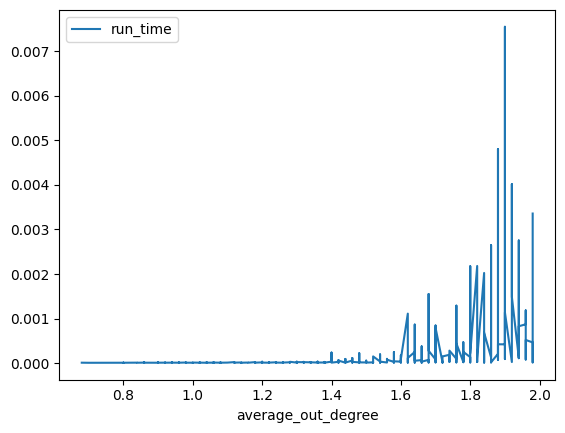

In [18]:
to_plot2.plot(x="average_out_degree", y="run_time")

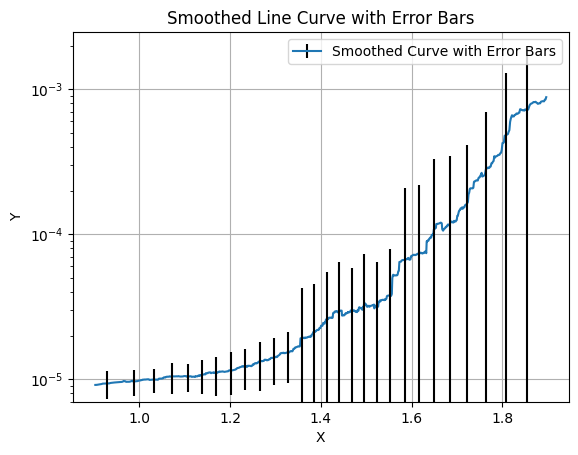

In [19]:
rolling_window = 100
df_smoothed = to_plot2.rolling(rolling_window, center=True).mean()
df_std = to_plot2.rolling(rolling_window, center=True).std()

# Plot the smoothed curve with error bars
plt.errorbar(df_smoothed['average_out_degree'], df_smoothed['run_time'], yerr=df_std['run_time'], label='Smoothed Curve with Error Bars', errorevery=30, barsabove=True, ecolor="black")
plt.xlabel('X')
plt.ylabel('Y')
plt.yscale('log')
plt.title('Smoothed Line Curve with Error Bars')
plt.legend()
plt.grid(True)
plt.show()